# Project Timeline 

## Imports

In [33]:
import plotly.figure_factory as ff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

## Gantt Chart

In [34]:
df = pd.read_csv('/home/ah2719/FYP/Spatial_Finance_Transport/project_timeline.csv')
df.head()

,Task,Section,Start,End,Completion
0,Initial Scoping,Initial Research,2022-11-08,2022-11-22,1.0
1,Literature Review,Initial Research,2022-11-22,2022-12-27,1.0
2,Interim Report,Initial Research,2022-12-06,2023-01-24,0.8
3,Ethics Checklist,Initial Research,2023-01-10,2023-01-24,0.8
4,Technical Experimentation,Implementation,2022-12-20,2023-01-24,0.5


In [35]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df.dtypes

Task                  object
Section               object
Start         datetime64[ns]
End           datetime64[ns]
Completion           float64
dtype: object

In [36]:
# project start date
proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

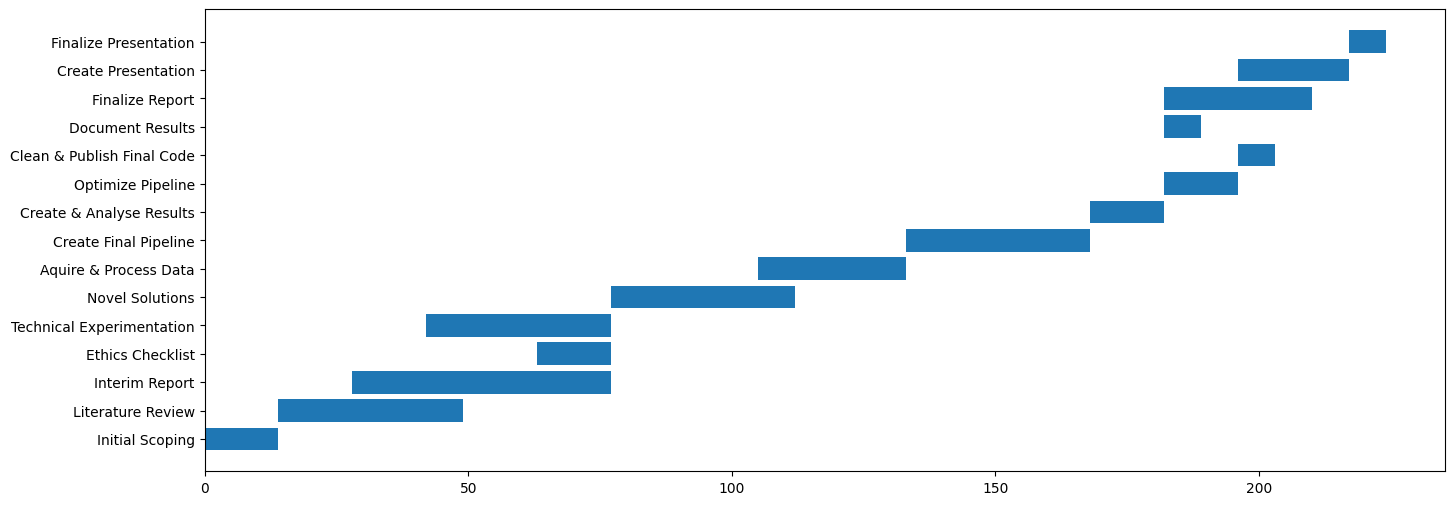

In [37]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num)
plt.show()

In [38]:
# create a column with the color for each section
c_dict = {'Initial Research':'#E64646', 'Implementation':'#E69646', 'Optimization':'#34D05C', 'Deliverables':'#34D0C3'}
def color(row):
    return c_dict[row['Section']]
df['color'] = df.apply(color, axis=1)

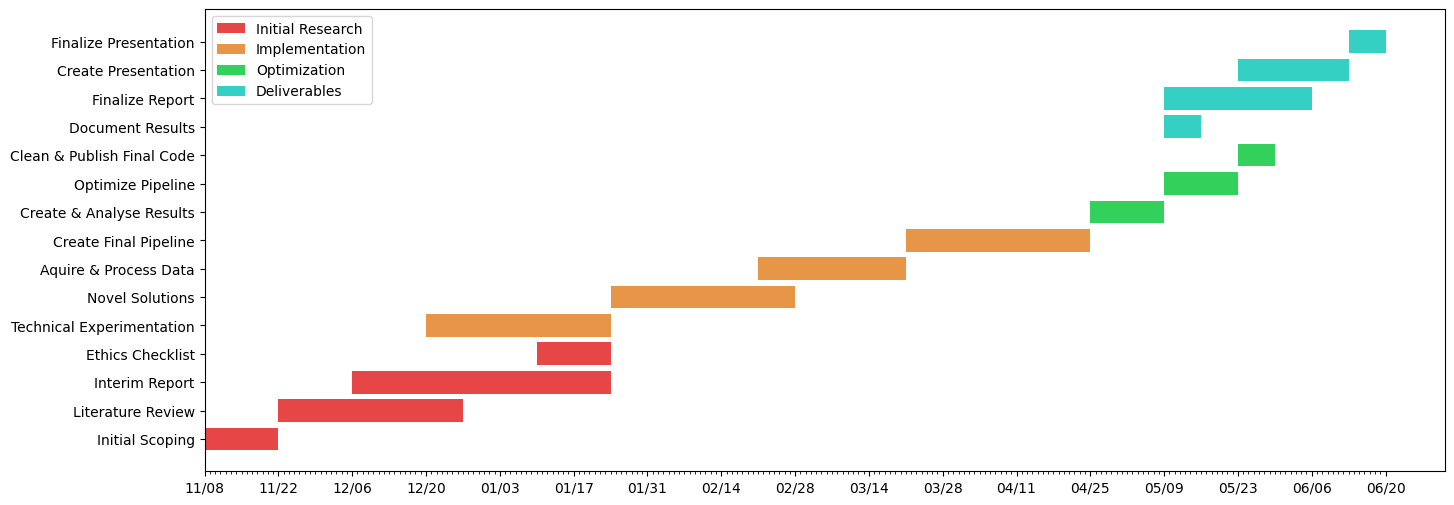

In [39]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color)
##### LEGENDS #####
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 14)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::14])
plt.show()

In [40]:
# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

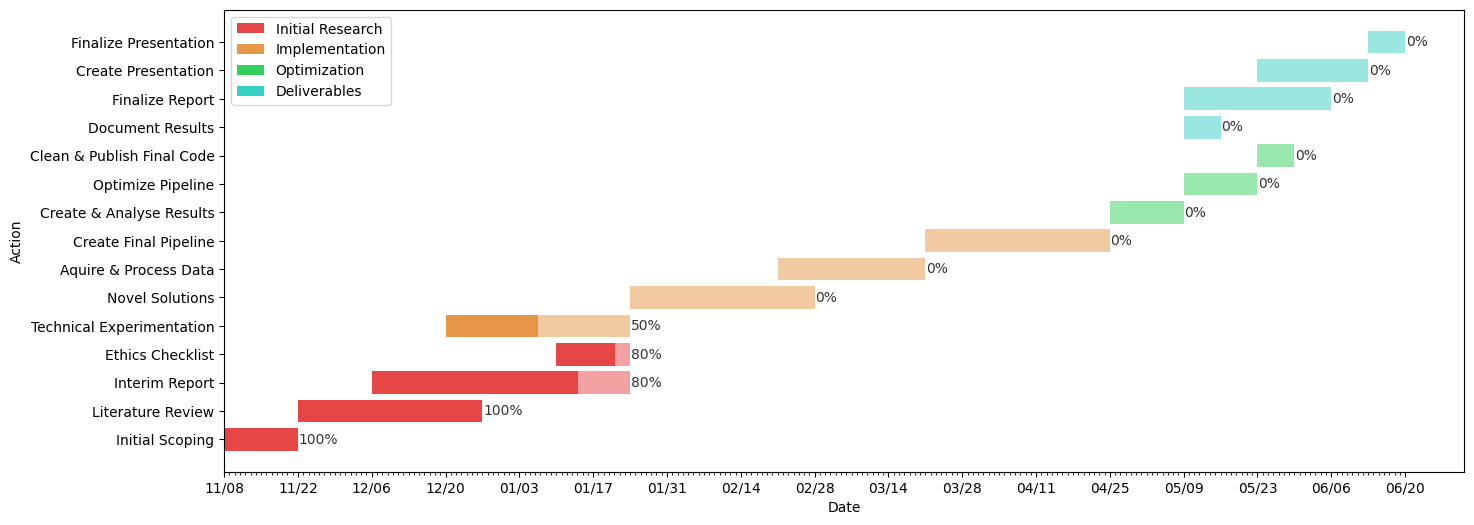

In [43]:
fig, ax = plt.subplots(1, figsize=(16,6))
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)
# texts
for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, 
            f"{int(row.Completion*100)}%", 
            va='center', alpha=0.8)
##### LEGENDS #####
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 14)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::14])
plt.xlabel('Date')
plt.ylabel('Action')
plt.show()